In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
cancer = load_breast_cancer()

In [3]:
X = cancer.data
y = cancer.target

### 0 악성, 1 양성

In [4]:
cancer.target_names #악성, 양성

array(['malignant', 'benign'], dtype='<U9')

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 7)

In [7]:
model = LogisticRegression(C=0.001, max_iter=100000)
model.fit(X_train,y_train)

LogisticRegression(C=0.001, max_iter=100000)

In [8]:
pre = model.predict(X_test)
pre

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [9]:
np.bincount(pre)

array([ 39, 104], dtype=int64)

In [10]:
np.bincount(y_test)

array([45, 98], dtype=int64)

### confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix,classification_report

### 0,0 진짜 악성, 예측 악성
### 0,1 진짜 악성, 예측 양성
### 1,0 진짜 양성, 예측 악성
### 1,1 진짜 양성, 예측 양성

In [12]:
confusion_matrix(y_test,model.predict(X_test))

array([[38,  7],
       [ 1, 97]], dtype=int64)

### 0(악성 종양)을 양성으로 볼 경우 윗 줄,  1(양성 종양)을 양성으로 볼 경우 아랫 줄

In [13]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        45
           1       0.93      0.99      0.96        98

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.95      0.94      0.94       143



### ROC 곡선 그리기

In [14]:
from sklearn.metrics import roc_curve
fpr,tpr,th = roc_curve(y_test,model.decision_function(X_test))

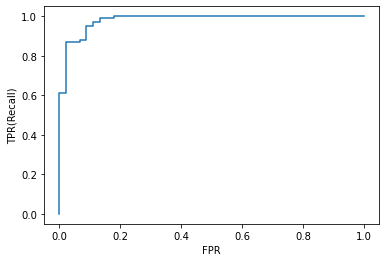

In [15]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR(Recall)")
plt.show()

### C값 조정

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
C_list = [0.0001,0.001,0.01,0.1,1,10,100,1000]
for C in C_list:
    model2 = LogisticRegression(C=C, solver="lbfgs", max_iter=1000000)
    result = cross_val_score(model2, X_train, y_train, cv=5)
    print("c : {}\t score : {}".format(C,result.mean()))

c : 0.0001	 score : 0.9272229822161423
c : 0.001	 score : 0.9389876880984952
c : 0.01	 score : 0.9530506155950752
c : 0.1	 score : 0.9530232558139534
c : 1	 score : 0.9554035567715458
c : 10	 score : 0.9601094391244871
c : 100	 score : 0.9600547195622434
c : 1000	 score : 0.9577291381668948


In [18]:
model2 = LogisticRegression(C=10,solver="lbfgs", max_iter=1000000)
model2.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000000)

In [19]:
print(metrics.classification_report(y_test,model2.predict(X_test)))

NameError: name 'metrics' is not defined

### ROC 곡선 비교

In [ ]:
fpr2,tpr2,th2 = roc_curve(y_test,model2.decision_function(X_test))

In [ ]:
print(th2)

In [ ]:
plt.plot(fpr,tpr)
plt.plot(fpr2,tpr2)
plt.xlabel("FPR")
plt.ylabel("TPR(Recall)")
plt.show()

### scoring을 이용한 ROC 교차검증
### scoring은 성능검증에 사용할 함수이름

In [ ]:
"""RMSE로 평가"""
C_list = [0.0001,0.001,0.01,0.1,1,10,100,1000]
for C in C_list:
    model2 = LogisticRegression(C=C, solver="lbfgs", max_iter=1000000)
    result = cross_val_score(model2, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
    print("c : {}\t score : {}".format(C,np.sqrt(-result.mean())))

In [ ]:
"""AUC로 평가"""
C_list = [0.0001,0.001,0.01,0.1,1,10,100,1000]
for C in C_list:
    model2 = LogisticRegression(C=C, solver="lbfgs", max_iter=1000000)
    result = cross_val_score(model2, X_train, y_train, cv=5, scoring="roc_auc")
    print("c : {}\t score : {}".format(C,result.mean()))

### ROC 곡선 비교(위에랑 똑같음)

In [ ]:
model3 = LogisticRegression(C=10, solver="lbfgs", max_iter=1000000)
model3.fit(X_train,y_train)

In [ ]:
fpr3,tpr3,th3 = roc_curve(y_test,model3.decision_function(X_test))

In [ ]:
plt.plot(fpr,tpr)
plt.plot(fpr2,tpr2)
plt.plot(fpr3,tpr3)
plt.xlabel("FPR")
plt.ylabel("TPR(Recall)")
plt.show()